<a href="https://colab.research.google.com/github/peterbmob/DHMVADoE/blob/main/Excercises/PCR_PLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCR and PLS  

In this example, we will compare the PCR and PLS methods. Our goal is to illustrate how PLS can outperform PCR when the target is strongly correlated with some directions in the data that have a low variance.



First, we load the data and perform a PCA.

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

food = pd.read_csv("https://userpage.fu-berlin.de/soga/data/raw-data/food-texture.csv")
# exclude first column
food = food.iloc[:, 1:]


scaler = StandardScaler().fit(food)
food_scaled = scaler.transform(food)
food_scaled=pd.DataFrame(food_scaled,columns=food.columns)
food_scaled.head()

,Oil,Density,Crispy,Fracture,Hardness
0,-0.445430,0.790272,-0.864754,0.395481,-1.011854
1,0.315989,-1.603262,1.410914,-2.191776,0.351131
2,-0.635784,0.100610,0.273080,-0.713344,0.480939
3,-0.318527,0.506293,-0.864754,1.873913,-1.076758
4,-0.572333,0.952546,-0.295837,0.949893,0.480939


In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



food_pca = PCA().fit(food_scaled)


food_pca_eigen = pd.DataFrame(
    food_pca.components_.T,
    columns=["PC1", "PC2", "PC3", "PC4", "PC5"],
    index=food_scaled.columns,
)

# Compute the loadings
food_pca_data=pd.DataFrame()
food_pca_data["PC"]=food_pca_eigen.columns
food_pca_data["Explained Variance"] = food_pca.explained_variance_
food_pca_data["Explained Variance Ratio"] = food_pca.explained_variance_ratio_
food_pca_data.set_index('PC')

# Compute the scores
food_pca_scores = pd.DataFrame(
    food_pca.transform(food_scaled),
    columns=["PC1", "PC2", "PC3", "PC4", "PC5"],
    index=food_scaled.index,
)

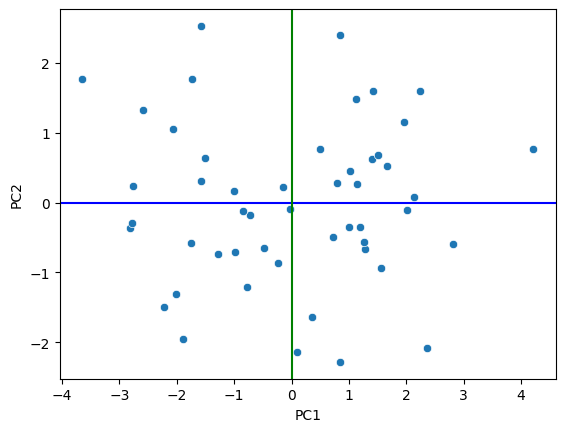

In [9]:
# Plot the scores
sns.scatterplot(data=food_pca_scores, x="PC1", y="PC2")
plt.axhline(0, color="blue")
plt.axvline(0, color="green")
plt.show()

In [ ]:
Lets choose a target...

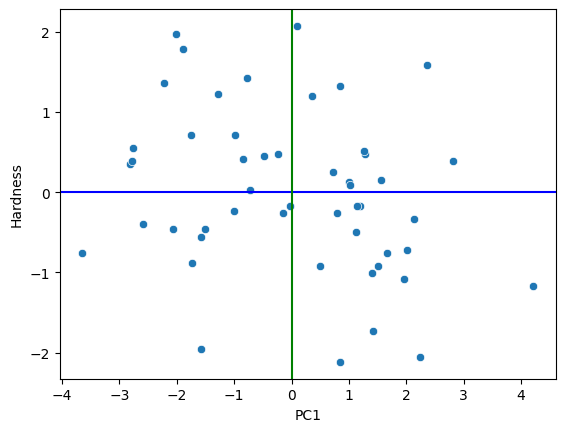

In [45]:
# Plot the scores
sns.scatterplot(x=food_pca_scores["PC1"], y=food_scaled['Hardness'])
plt.axhline(0, color="blue")
plt.axvline(0, color="green")
plt.show()

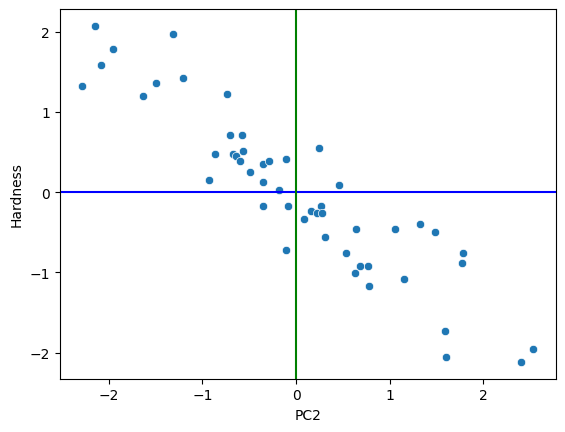

In [37]:
# Plot the scores
sns.scatterplot(x=food_pca_scores["PC2"], y=food_scaled['Hardness'])
plt.axhline(0, color="blue")
plt.axvline(0, color="green")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


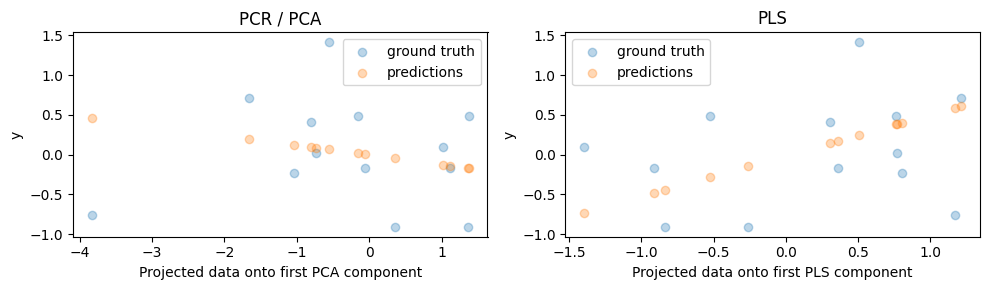

In [53]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
rng = np.random.RandomState(0)

X_train, X_test, y_train, y_test = train_test_split(food_scaled[['Oil',	'Density', 'Crispy', 'Fracture']], food_scaled['Hardness'],test_size=0.25, random_state=rng)

pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[0].scatter(
    pca.transform(X_test), pcr.predict(X_test), alpha=0.3, label="predictions"
)
axes[0].set(
    xlabel="Projected data onto first PCA component", ylabel="y", title="PCR / PCA"
)
axes[0].legend()
axes[1].scatter(pls.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[1].scatter(
    pls.transform(X_test), pls.predict(X_test), alpha=0.3, label="predictions"
)
axes[1].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
axes[1].legend()
plt.tight_layout()
plt.show()


In [54]:
print(f"PCR r-squared {pcr.score(X_test, y_test):.3f}")
print(f"PLS r-squared {pls.score(X_test, y_test):.3f}")

PCR r-squared -0.062
PLS r-squared -0.109


In [55]:
pca_2 = make_pipeline(PCA(n_components=2), LinearRegression())
pca_2.fit(X_train, y_train)
pls_2 = PLSRegression(n_components=2)
pls_2.fit(X_train, y_train)

print(f"PCR r-squared with 2 components {pca_2.score(X_test, y_test):.3f}")
print(f"PLS r-squared with 2 components {pls_2.score(X_test, y_test):.3f}")

PCR r-squared with 2 components 0.038
PLS r-squared with 2 components 0.034


In [56]:
pca_3 = make_pipeline(PCA(n_components=3), LinearRegression())
pca_3.fit(X_train, y_train)
pls_3 = PLSRegression(n_components=3)
pls_3.fit(X_train, y_train)

print(f"PCR r-squared with 3 components {pca_3.score(X_test, y_test):.3f}")
print(f"PLS r-squared with 3 components {pls_3.score(X_test, y_test):.3f}")

PCR r-squared with 3 components -0.028
PLS r-squared with 3 components 0.075


In [52]:
pca_4 = make_pipeline(PCA(n_components=4), LinearRegression())
pca_4.fit(X_train, y_train)
pls_4 = PLSRegression(n_components=4)
pls_4.fit(X_train, y_train)

print(f"PCR r-squared with 3 components {pca_4.score(X_test, y_test):.3f}")
print(f"PLS r-squared with 3 components {pls_4.score(X_test, y_test):.3f}")

PCR r-squared with 3 components 0.167
PLS r-squared with 3 components 0.167
